# 第5讲 统计推断基础


In [2]:
##数据说明：本数据是
##名称	中文含义
#dis_name   小区名称
#rate       房价同比增长率
house_price_gr<-read.csv("data/house_price_gr.csv",fileEncoding="GBK")
attach(house_price_gr)

head(house_price_gr)

dis_name,rate
东城区甘南小区,0.16974719
东城区察慈小区,0.16548436
东城区胡家园小区,0.14135830
东城区台基厂小区,0.06319671
东城区青年湖小区,0.10152769
东城区小黄庄小区,0.06846723


In [3]:
summary(rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02954 0.08003 0.10490 0.11010 0.14010 0.24370 

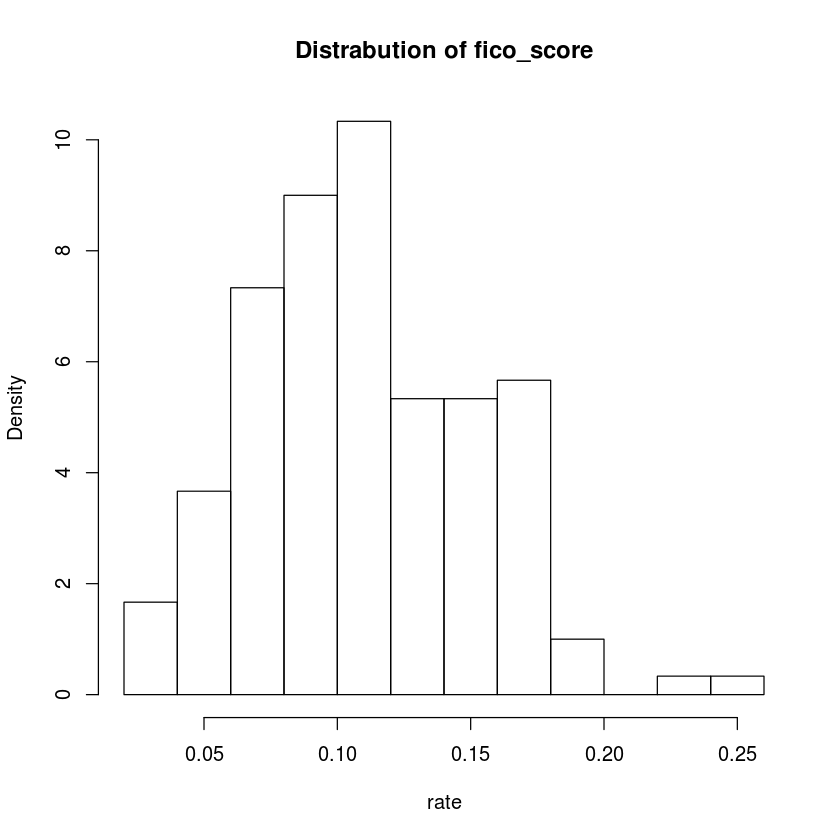

In [4]:
hist(rate,prob=T,main="Distrabution of fico_score")

In [5]:
lines(density(rate))

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


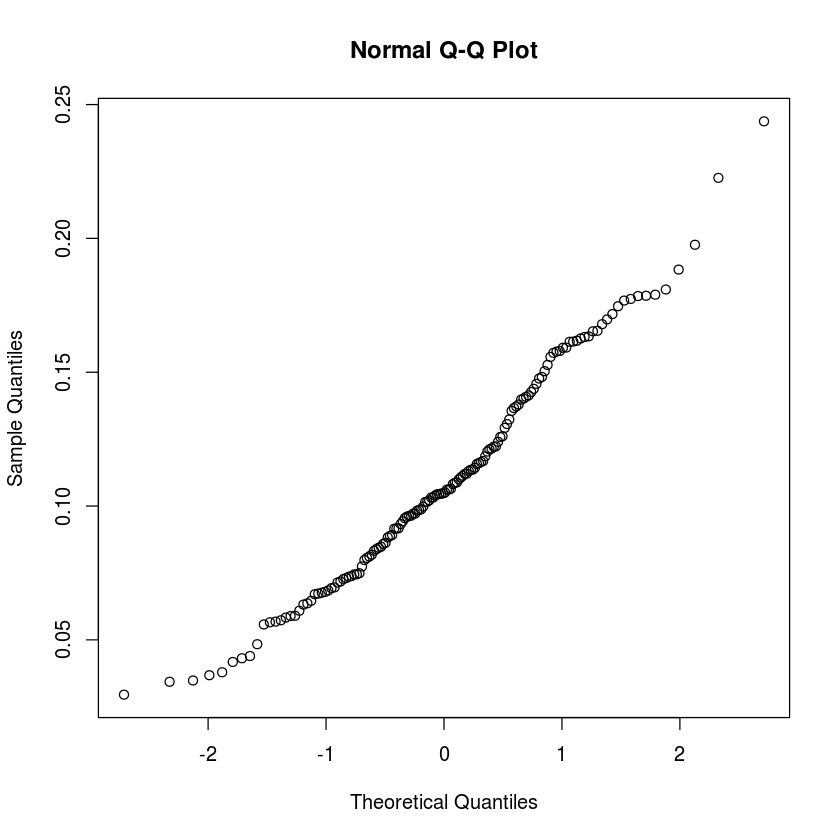

In [6]:
qqnorm(rate);

In [7]:
qqline(rate)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


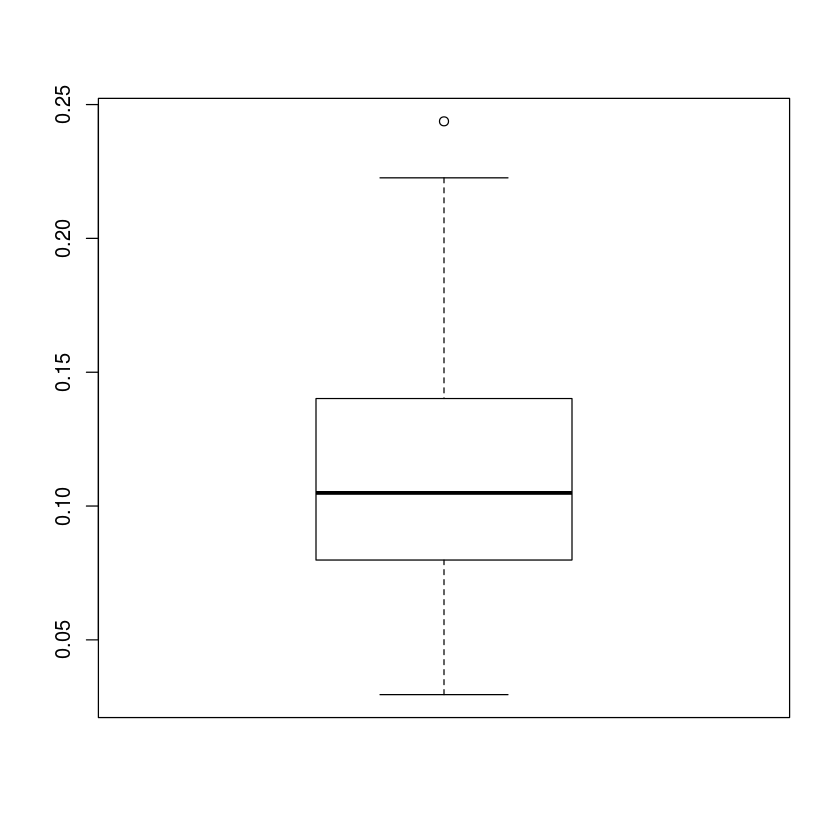

In [8]:
boxplot(rate)

In [9]:
#如果你要求的只是95%的置信度的话，t.test(),这个函数本来是用于做单样本T检验的
t.test(rate)


	One Sample t-test

data:  rate
t = 32.612, df = 149, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.1033923 0.1167297
sample estimates:
mean of x 
 0.110061 


In [10]:
rate_mean<-mean(rate)
se<- sd(rate)/sqrt(length(rate))
lb<-rate_mean-1.98*se
ub<-rate_mean+1.98*se
c(lb,ub)

[1] 0.1033788 0.1167432

In [11]:
#如果要求任意置信度下的置信区间的话，就需要自己编一个函数了。
confint<-function(x,sigma=-1,alpha=0.05)
{
  n<-length(x)
  xb<-mean(x)
  tmp<-(sd(x)/sqrt(n))*qt(1-alpha/2,n-1);df<- n-1
  data.frame(mean=xb,df=df,LB=xb-tmp,UB=xb+tmp)
}

In [12]:
confint(rate,0.05)  

mean,df,LB,UB
0.110061,149,0.1033923,0.1167297


##   5.2 假设检验与单样本T检验

In [13]:
#一般认为FICO高于690的客户信誉较高，请检验该产品的客户整体信用是否高于690
t.test(rate,mu=0.1)


	One Sample t-test

data:  rate
t = 2.9812, df = 149, p-value = 0.003355
alternative hypothesis: true mean is not equal to 0.1
95 percent confidence interval:
 0.1033923 0.1167297
sample estimates:
mean of x 
 0.110061 


In [14]:
##数据说明：本数据是一份汽车贷款违约数据
##名称	中文含义
#id	id
#Acc	是否开卡(1=已开通)
#avg_exp	月均信用卡支出（元）
#avg_exp_ln	月均信用卡支出的自然对数
#gender	性别(男=1)
#Age	年龄
#Income	年收入（万元）
#Ownrent	是否自有住房（有=1；无=0)
#Selfempl	是否自谋职业(1=yes, 0=no)
#dist_home_val	所住小区房屋均价(万元)
#dist_avg_income	当地人均收入
#high_avg	高出当地平均收入
#edu_class	教育等级：小学及以下开通=0，中学=1，本科=2，研究生=3
#—————————————————————————————————————————————————————————————————————————————————————————————————————————————###

#导入数据和数据清洗
creditcard_exp<-read.csv("data/creditcard_exp.csv")
creditcard_exp<-na.omit(creditcard_exp)

head(creditcard_exp)

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
1,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.93279,1600,0.10236053,3
2,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.79632,1024,0.05118421,2
4,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.27563,1681,0.19721842,3
5,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.34647,784,0.06267632,2
6,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.33226,1681,-0.30211316,3
7,97,1,1151.15,7.048517,1,33,11.70575,1,0,38.90,11.52605,1089,0.17969737,3


##   5.3 两样本T检验

In [15]:
#tapply
#根据性别比较支出.
attach(creditcard_exp)
tapply(avg_exp, gender, summary)

$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  163.2   593.3   813.6   925.7  1205.0  1992.0 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  648.2   829.9  1020.0  1129.0  1238.0  2430.0 


In [16]:
#第一步:
var.test(avg_exp~gender)


	F test to compare two variances

data:  avg_exp by gender
F = 0.86857, num df = 49, denom df = 19, p-value = 0.6702
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3779117 1.7529818
sample estimates:
ratio of variances 
          0.868572 


In [17]:
#第二步:
t.test(avg_exp~gender,var.equal=T)


	Two Sample t-test

data:  avg_exp by gender
t = -1.7429, df = 68, p-value = 0.08587
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -435.04352   29.39192
sample estimates:
mean in group 0 mean in group 1 
       925.7052       1128.5310 


# 5.4 方差分析

In [19]:
#单因素方差分析
creditcard_exp$edu_class<-as.factor(creditcard_exp$edu_class)
creditcard_exp$gender<-as.factor(creditcard_exp$gender)
attach(creditcard_exp)#在原始数据更新后，需要重新执行该语句

The following objects are masked from creditcard_exp (pos = 3):

    Acc, Age, age2, avg_exp, avg_exp_ln, dist_avg_income,
    dist_home_val, edu_class, gender, high_avg, id, Income, Ownrent,
    Selfempl



In [20]:
tapply(avg_exp, edu_class, summary)

$`0`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  163.2   185.3   207.4   207.4   229.5   251.6 

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  418.8   525.6   593.9   641.9   736.1   987.7 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  610.2   807.8   959.8   973.3  1075.0  1473.0 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    816    1167    1343    1422    1661    2430 


In [21]:
#oneway.test(avg_exp~edu_class,var.equal=F)
anova(lm(creditcard_exp$avg_exp~creditcard_exp$edu_class))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
creditcard_exp$edu_class,3,8126056,2708685.47,31.82568,7.658362e-13
Residuals,66,5617263,85110.05,NA,NA


In [22]:
#多因素方差分析
anova(lm(avg_exp~edu_class+gender))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
edu_class,3,8126056.42,2708685.47,31.578365,1.031496e-12
gender,1,41782.73,41782.73,0.487111,4.877082e-01
Residuals,65,5575480.51,85776.62,NA,NA


In [23]:
ana<-lm(avg_exp~edu_class+gender)
summary(ana)


Call:
lm(formula = avg_exp ~ edu_class + gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-574.71 -156.71  -48.62  142.11 1039.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   207.37     207.09   1.001 0.320381    
edu_class1    439.60     216.03   2.035 0.045947 *  
edu_class2    786.06     217.83   3.609 0.000599 ***
edu_class3   1241.19     219.56   5.653 3.79e-07 ***
gender1       -57.82      82.84  -0.698 0.487708    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 292.9 on 65 degrees of freedom
Multiple R-squared:  0.5943,	Adjusted R-squared:  0.5693 
F-statistic: 23.81 on 4 and 65 DF,  p-value: 3.75e-12


In [24]:
anova(lm(avg_exp~edu_class+gender+edu_class*gender))
ana<-lm(avg_exp~edu_class+gender+edu_class*gender)
summary(ana)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
edu_class,3,8126056.42,2708685.47,33.8393497,3.753889e-13
gender,1,41782.73,41782.73,0.5219877,4.726685e-01
edu_class:gender,2,532618.09,266309.05,3.3269736,4.230939e-02
Residuals,63,5042862.41,80045.44,NA,NA



Call:
lm(formula = avg_exp ~ edu_class + gender + edu_class * gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-448.26 -138.18  -45.72  107.14 1165.74 

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           207.4      200.1   1.037  0.30391    
edu_class1            417.8      209.4   1.996  0.05031 .  
edu_class2            732.3      213.0   3.438  0.00104 ** 
edu_class3           1346.6      216.1   6.232 4.27e-08 ***
gender1              -289.7      121.1  -2.391  0.01980 *  
edu_class1:gender1    482.4      241.9   1.994  0.05046 .  
edu_class2:gender1    386.5      173.3   2.231  0.02926 *  
edu_class3:gender1       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 282.9 on 63 degrees of freedom
Multiple R-squared:  0.6331,	Adjusted R-squared:  0.5981 
F-statistic: 18.12 on 6 and 63 DF,  p-value: 4.352e-12


# 5.5 相关分析

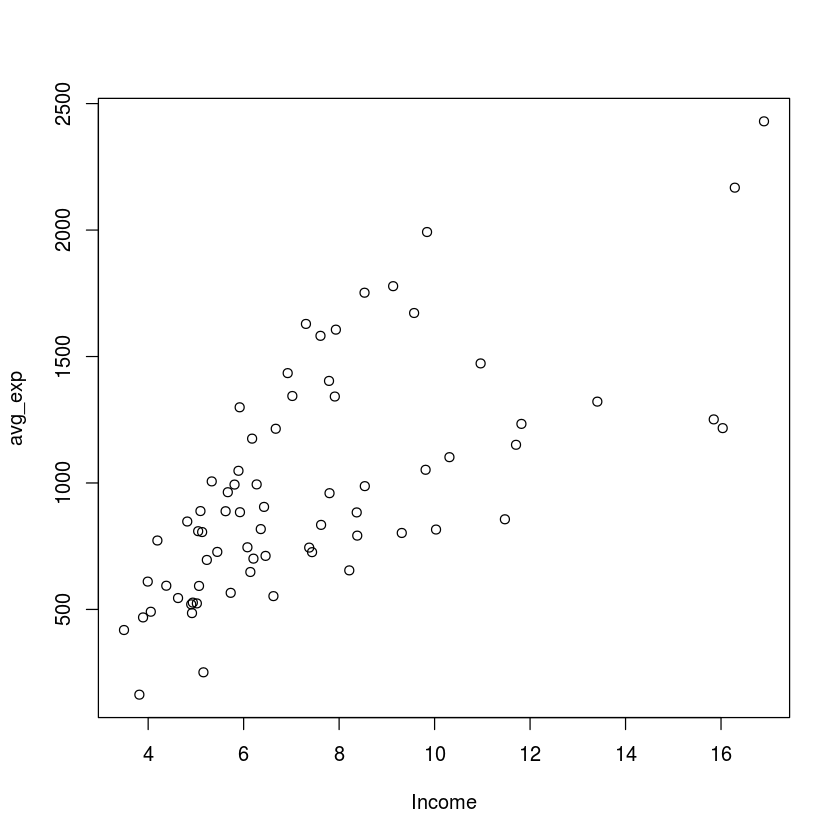

In [25]:
#散点图
plot(Income,avg_exp)

In [26]:
#相关性分析:“spearman”,“pearson” 和 "kendall",
cor.test(Income,avg_exp,method="pearson")
cor.test(Income,avg_exp,method="spearman")



	Pearson's product-moment correlation

data:  Income and avg_exp
t = 7.5239, df = 68, p-value = 1.603e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5216538 0.7847069
sample estimates:
      cor 
0.6740108 



	Spearman's rank correlation rho

data:  Income and avg_exp
S = 16694, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7079171 


##      5.6卡方检验

In [27]:
accepts<-read.csv("data/accepts.csv",fileEncoding="GBK")
#accepts<-na.omit(accepts)

In [28]:
table(accepts$bankruptcy_ind)


        N    Y 
 217 5180  448 

In [29]:
m<-matrix(table(accepts$bankruptcy_ind))
prop.table(m, 2)

0.03712575
0.88622754
0.07664671


In [30]:
#barplot(table(accepts$bankruptcy_ind))
table(accepts$bankruptcy_ind,accepts$bad_ind)

   
       0    1
     140   77
  N 4163 1017
  Y  345  103

In [31]:
#对于两分类变量的列联表分析，使用prettyR包中的xtab函数
library(prettyR)
xtab(~ bankruptcy_ind + bad_ind, data=accepts)

Crosstabulation of bankruptcy_ind by bad_ind 
	bad_ind
bankruptcy_ind      0      1
     140     77    217
   64.52  35.48      -
    3.01   6.43   3.71

N   4163   1017   5180
   80.37  19.63      -
   89.57  84.96  88.62

Y    345    103    448
   77.01  22.99      -
    7.42   8.60   7.66

    4648   1197   5845
   79.52  20.48 100.00


In [32]:
chisq.test(x=accepts$bankruptcy_ind,y=accepts$bad_ind)
xtab(~ bankruptcy_ind + bad_ind, data=accepts, chisq = TRUE)


	Pearson's Chi-squared test

data:  accepts$bankruptcy_ind and accepts$bad_ind
X-squared = 34.012, df = 2, p-value = 4.115e-08


Crosstabulation of bankruptcy_ind by bad_ind 
	bad_ind
bankruptcy_ind      0      1
     140     77    217
   64.52  35.48      -
    3.01   6.43   3.71

N   4163   1017   5180
   80.37  19.63      -
   89.57  84.96  88.62

Y    345    103    448
   77.01  22.99      -
    7.42   8.60   7.66

    4648   1197   5845
   79.52  20.48 100.00
X2[2]=34.012, p=4.114603e-08

